In [1]:
#written by Francis Osei Tutu Afrifa, 2023.

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import gc
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

gc.collect()

4

**Exercise #1—Basic PSD plots
In the following exercise, we are going to use measurements of size distributions obtained by 3 
different cloud probes on the King Air during a penetration of a cumulus cloud north of Laramie 
on Aug10, 2020 as part of the HCPI project.
Datafile: SD.20200810.cdf 
On grizzly, the file resides in the directory: /kingair_data/hcpi20/OAP_processed/20200810/ 
Problem 1a – We will begin with plotting the cloud droplet distribution that is measured by 
the CDP (cloud droplet probe—see last page about information about probes). [Hint – we 
are interested in variables that have ‘CDP’ in their name [NOT ‘CIP’!]]**

1. Use the variable ‘time’ to select the time during the cloud penetration. The cloud penetration began at 213335 and ended at 213342, inclusive (the penetration was 8 seconds long)


2. The variable ‘size_dist_CDP’ contains the number concentration (measured each second) for each size bin. It has been normalized by the width of each size bin. Units are # cm-3 µm-1


3. There exist four variables ‘bin_XXX_CDP’ that describe the bin characteristics for the CDP data. ‘bin_min_CDP’ is the minimum size for each bin, ‘bin_max_CDP’ is the maximum size for each bin, ‘bin_mid_CDP’ in the midpoint size (min+max/2), and ‘bin_dD_CDP’ in the binwidth. All of these variables are in µm.

In [2]:
file = xr.open_dataset('SD.20200810.cdf')
file

<xarray.Dataset>
Dimensions:               (Time: 8838, bins_2DS: 27, areabins: 10, bins_CIP: 1,
                           bins_2DP: 1, bins_2DC: 1, bins_CDP: 27, bins_HVPS: 28)
Dimensions without coordinates: Time, bins_2DS, areabins, bins_CIP, bins_2DP,
                                bins_2DC, bins_CDP, bins_HVPS
Data variables: (12/51)
    time                  (Time) float64 ...
    bin_min_2DS           (bins_2DS) float64 ...
    bin_max_2DS           (bins_2DS) float64 ...
    bin_mid_2DS           (bins_2DS) float64 ...
    bin_dD_2DS            (bins_2DS) float64 ...
    size_dist_2DS_H       (Time, bins_2DS) float64 ...
    ...                    ...
    bin_mid_HVPS          (bins_HVPS) float64 ...
    bin_dD_HVPS           (bins_HVPS) float64 ...
    size_dist_HVPS        (Time, bins_HVPS) float64 ...
    size_dist_area_HVPS   (Time, bins_HVPS, areabins) float64 ...
    total_conc_HVPS       (Time) float64 ...
    reject_ratio_HVPS     (Time) float64 ...
Attributes:
    creation_date:           04-Nov-2020 14:22:13
    git_ID:                  fatal: Not a git repository (or any parent up to...
    center_entire_criteria:  centerin
    source_files:            /kingair_data/hcpi20/OAP_processed/20200810/SD.P...
    version:                 SNOWIE_1.0
    area_desc:               10 area ratio bins of width .1 (0-1.0) from non ...

In [3]:
### Extract data for only the time during the penetration to be used for our total work
file_extract = file.sel(Time=slice(4229,4229+8))
file_extract

<xarray.Dataset>
Dimensions:               (Time: 8, bins_2DS: 27, areabins: 10, bins_CIP: 1,
                           bins_2DP: 1, bins_2DC: 1, bins_CDP: 27, bins_HVPS: 28)
Dimensions without coordinates: Time, bins_2DS, areabins, bins_CIP, bins_2DP,
                                bins_2DC, bins_CDP, bins_HVPS
Data variables: (12/51)
    time                  (Time) float64 ...
    bin_min_2DS           (bins_2DS) float64 ...
    bin_max_2DS           (bins_2DS) float64 ...
    bin_mid_2DS           (bins_2DS) float64 ...
    bin_dD_2DS            (bins_2DS) float64 ...
    size_dist_2DS_H       (Time, bins_2DS) float64 ...
    ...                    ...
    bin_mid_HVPS          (bins_HVPS) float64 ...
    bin_dD_HVPS           (bins_HVPS) float64 ...
    size_dist_HVPS        (Time, bins_HVPS) float64 ...
    size_dist_area_HVPS   (Time, bins_HVPS, areabins) float64 ...
    total_conc_HVPS       (Time) float64 ...
    reject_ratio_HVPS     (Time) float64 ...
Attributes:
    creation_date:           04-Nov-2020 14:22:13
    git_ID:                  fatal: Not a git repository (or any parent up to...
    center_entire_criteria:  centerin
    source_files:            /kingair_data/hcpi20/OAP_processed/20200810/SD.P...
    version:                 SNOWIE_1.0
    area_desc:               10 area ratio bins of width .1 (0-1.0) from non ...

In [4]:
# Assign various variables for the CDP data
size_dist_CDP = file_extract.size_dist_CDP
bin_min_CDP = file_extract.bin_min_CDP
bin_mid_CDP = file_extract.bin_mid_CDP
bin_max_CDP = file_extract.bin_max_CDP
bin_dD_CDP = file_extract.bin_dD_CDP

4. PLOT 1: Create 8 separate plots. Each plot will show the cloud droplet size distribution measured in 1 second. Label the plot for the time which the measurement was made (for example, the first plot should be labeled 213335). Utilize linear axes for both the abscissa (x) and the ordinate (y), and range the axes from 0 to 60 µm and 0 to 100 cm-3 µm-1, respectively

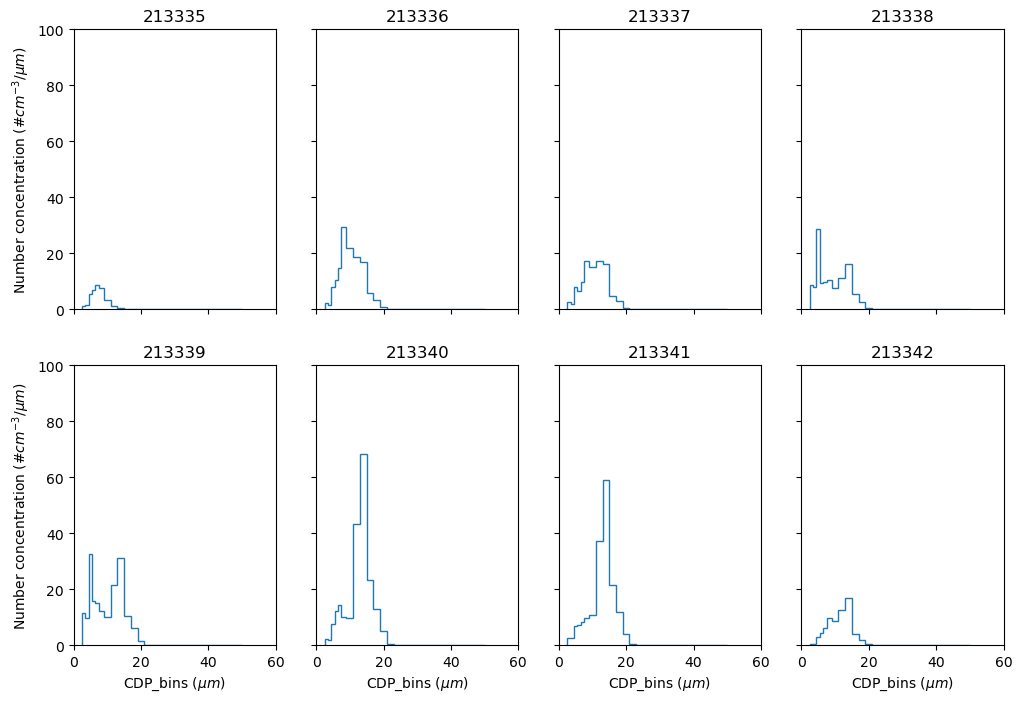

In [5]:
# Create bin size or number of bins from the bin midpoint values to be used for the histogram (stair plot)
diameter = np.array(bin_mid_CDP.values)
diameter = np.append(diameter, 50)

# Extract the time variable from which we'll be creating the plots for every single period
times = file_extract['time']
fig,axes = plt.subplots(nrows=2,ncols=4,figsize=(12,8), sharex=True, sharey=True)
ax = axes.flatten()
for i,j in enumerate(times):
    ax[i].stairs(size_dist_CDP[i].values,diameter)
    ax[i].set(title=str(j.values)[:6], ylim=(0,100), xlim=(0,60))

ax[0].set(ylabel=('Number concentration (#$cm^{-3}/\mu m$)')) 
ax[4].set(ylabel=('Number concentration (#$cm^{-3}/\mu m$)'),xlabel=('CDP_bins ($\mu m$)'))
ax[5].set(xlabel=('CDP_bins ($\mu m$)'))
ax[6].set(xlabel=('CDP_bins ($\mu m$)'))
ax[7].set(xlabel=('CDP_bins ($\mu m$)'))
plt.savefig('./%s.png' %('Lab2-Afrifa-Fig1'),bbox_inches='tight',dpi=100)

5. CALCULATION 1: Use the size distributions form the CDP to compute the following for each second: (For all of the 3 calculations listed below, be mindful of the units of all of the parameters that are included in the calculation…you may want to conduct a unit analysis)

    a. Total concentration (0th Moment of the distribution) of cloud droplets for each second during the penetration (the answer should be in units: cm-3)

In [6]:
size_dist_CDP

<xarray.DataArray 'size_dist_CDP' (Time: 8, bins_CDP: 27)>
[216 values with dtype=float64]
Dimensions without coordinates: Time, bins_CDP
Attributes:
    units:       cm-3/um
    long_name:   Number concentration as a function of diameter, normalized b...
    short_name:  N(D)

In [14]:
denorm_size_dist = size_dist_CDP*bin_dD_CDP #Multipy the size distribution by bin width to denormalize it
total_conc = [] ### create an empty list to store the total concentration values for each second
for i,j in enumerate(times):
    sum_ = sum(denorm_size_dist[i])
    total_conc.append(sum_.values.item()) ## append the total concentration for every second into the empty list

In [15]:
total_conc

[42.28929743170738,
 202.42981711775064,
 160.71868017688394,
 163.10600955598056,
 260.9834802933037,
 376.42471124976873,
 328.99440185911953,
 114.74344566464424]

 5b. Mean diameter (1st Moment of the distribution) of cloud droplets for each second during the penetration (the answer should be in units: µm)

In [17]:
denorm_bin_mid = denorm_size_dist*bin_mid_CDP #Multipy the denormalized size distribution by diameter (bin_mid point) to denormalize it
total_diameter = [] #empty array for the sum of diameters
for i,j in enumerate(times):
    sum_ = sum(denorm_bin_mid[i]) 
    total_diameter.append(sum_)

mean_diameter = np.array(total_diameter)/total_conc
mean_diameter

array([ 7.27005533,  9.86964337, 10.12751184,  8.94779924,  9.83219567,
       12.11691287, 12.17691471, 10.83711827])

 5c. Liquid water content (related to the 3rd Moment of the distribution) of cloud 
droplets for each second during the penetration (answer in g m-3


In [20]:
bin_mid_to_cm = (bin_mid_CDP/1e4)**3 #convert bin_mid from micrometers to centimeters

volume_cm3 = denorm_size_dist*bin_mid_to_cm
diameter3_sum = []
for i,j in enumerate(times):
    sum_ = sum(volume_cm3[i]) #sum up the cubed diameters times the concentration
    diameter3_sum.append(sum_)
    
#calculate liquid water content in g/m3
lwc = (1/6)*np.pi*1e6*np.array(diameter3_sum)
lwc

array([0.02867696, 0.14307527, 0.11826411, 0.10699121, 0.2042871 ,
       0.42462362, 0.37538003, 0.09636902])

 5d. PLOT 2: For each of the above 3 calculations, plot these variables vs. time during the penetration (each plot should have 8 points).

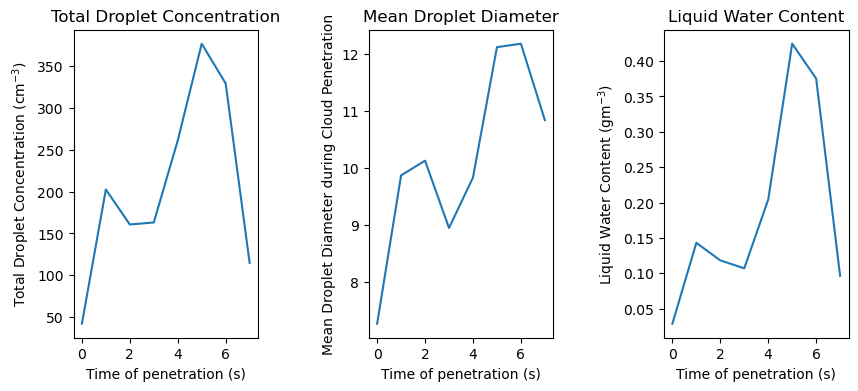

In [22]:
calc_data = [total_conc, mean_diameter, lwc]
titles = ['Total Droplet Concentration', 'Mean Droplet Diameter', 'Liquid Water Content']
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(10,4))
plt.subplots_adjust(wspace=0.6)
ax = axes.flatten()
for i,j in enumerate(calc_data):
    ax[i].plot(range(0,8),j)
    ax[i].set(title=titles[i], xlabel='Time of penetration (s)')

ax[0].set(ylabel=('Total Droplet Concentration (cm$^{-3}$)')) 
ax[1].set(ylabel=('Mean Droplet Diameter during Cloud Penetration'))
ax[2].set(ylabel=('Liquid Water Content (gm$^{-3}$)'))

plt.savefig('./%s.png' %('Lab2-Afrifa-Fig2'),bbox_inches='tight',dpi=100)

6. PLOT 3: Compute an average size distribution of cloud droplets during the penetration by calculating the average concentration in each bin through the 8 seconds. Plot the average size distribution using the same configuration as in #4 above.

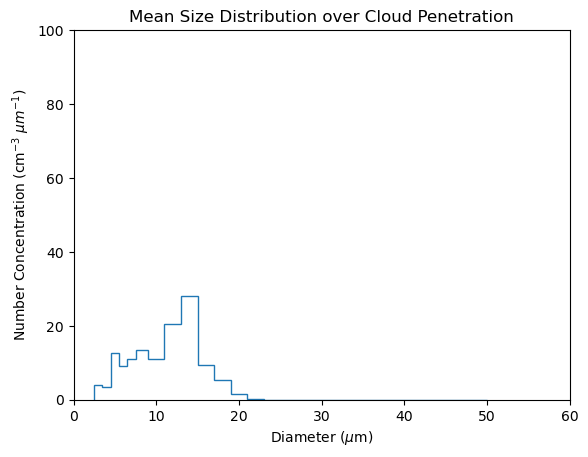

In [23]:
mean_size_dist = size_dist_CDP.mean('Time')
plt.stairs(mean_size_dist, diameter) #plot the mean of the bins
plt.xlim(0, 60)
plt.ylim(0, 100)
plt.title('Mean Size Distribution over Cloud Penetration')
plt.ylabel('Number Concentration (cm$^{-3}$ $\mu m^{-1}$)')
plt.xlabel('Diameter ($\mu$m)')

plt.savefig('./%s.png' %('Lab2-Afrifa-Fig3'),bbox_inches='tight',dpi=100)

In [71]:
Nv

(<xarray.DataArray 'size_dist_CDP' (bins_CDP: 27)>
 array([4.04739268e+00, 3.52260650e+00, 1.25857827e+01, 9.13205373e+00,
        1.09382069e+01, 1.34359837e+01, 1.10464610e+01, 2.04188963e+01,
        2.81939958e+01, 9.42752277e+00, 5.22176541e+00, 1.65062498e+00,
        2.10081499e-01, 3.90974320e-02, 1.11439211e-02, 3.68354144e-03,
        3.65571375e-03, 0.00000000e+00, 0.00000000e+00, 7.33689335e-03,
        5.52767026e-03, 1.82785688e-03, 1.82785688e-03, 0.00000000e+00,
        3.64722183e-03, 9.15862049e-03, 1.83476356e-02])
 Dimensions without coordinates: bins_CDP,
 <xarray.DataArray 'bin_mid_CDP' (bins_CDP: 27)>
 array([1.56250e+01, 4.28750e+01, 9.11250e+01, 1.66375e+02, 2.74625e+02,
        4.21875e+02, 7.29000e+02, 1.33100e+03, 2.19700e+03, 3.37500e+03,
        4.91300e+03, 6.85900e+03, 9.26100e+03, 1.21670e+04, 1.56250e+04,
        1.96830e+04, 2.43890e+04, 2.97910e+04, 3.59370e+04, 4.28750e+04,
        5.06530e+04, 5.93190e+04, 6.89210e+04, 7.95070e+04, 9.11250e+04,
   

7. PLOT 4: Now, consider what size drops within the distribution contribute most to the liquid water content. Since volume of the drop varies by D3, we might expect that some of the larger drops contribute more to liquid water, even if their concentration is less than that of smaller drops. In order to illustrate this, we will plot the Volume size distribution. Starting with your average size distribution computer in #6; multiply each bin by D3 of the size of that bin (use the bin midpoint size). This now is the volume size distribution, Nv. Plot Nv as a function of drop diameter

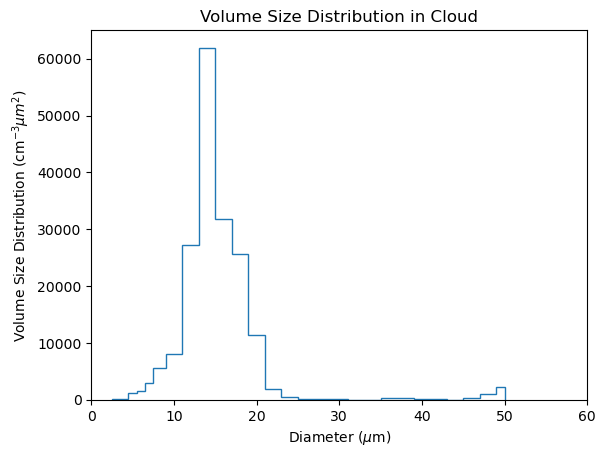

In [24]:
diameter_cubed = bin_mid_CDP**3 #the cube of the diameter
Nv = mean_size_dist*diameter_cubed #multiply the mean size_dist by D^3 of the size of each bin
plt.stairs(Nv, diameter) 
plt.title('Volume Size Distribution in Cloud')
plt.xlabel('Diameter ($\mu$m)')
plt.ylabel('Volume Size Distribution (cm$^{-3}$$\mu m^{2}$)')
plt.xlim(0, 60)
plt.savefig('./%s.png' %('Lab2-Afrifa-Fig4'),bbox_inches='tight',dpi=100)

**Problem 2a – In the next series of plots, we are going to include not only cloud droplets 
(from the CDP), but also larger hydrometeors measured by the 2DS_V and the HVPS. The 
resulting plots will include particles with diameters out to ~1 cm. [Hint – for these two new 
variables you will look for variable names “…2DS_V” and “…HVPS”. Note for the bin 
information from the 2DS, there is no “_V” at the end of the variable name.]**

1. For each the CDP, 2DS_V, and HVPS, compute a mean size distribution for the 8 second penetration.


2. PLOT 5: Plot all three size distributions on the same graph. Use a linear scale, similar to all previous plots. Here the ordinate (y) should range from 0 to 100 cm-3 µm-1; and the abscissa (x) should range from 0 to 10000 µm.Note that plotting the size distribution in this fashion is not very useful!

In [25]:
# Assign various variables for the 2DS data
size_dist_2DS = file_extract.size_dist_2DS_V
bin_min_2DS = file_extract.bin_min_2DS
bin_mid_2DS = file_extract.bin_mid_2DS
bin_max_2DS = file_extract.bin_max_2DS
bin_dD_2DS = file_extract.bin_dD_2DS

# Assign various variables for the HVPS data
size_dist_HVPS = file_extract.size_dist_HVPS
bin_min_HVPS = file_extract.bin_min_HVPS
bin_mid_HVPS = file_extract.bin_mid_HVPS
bin_max_HVPS = file_extract.bin_max_HVPS
bin_dD_HVPS = file_extract.bin_dD_HVPS

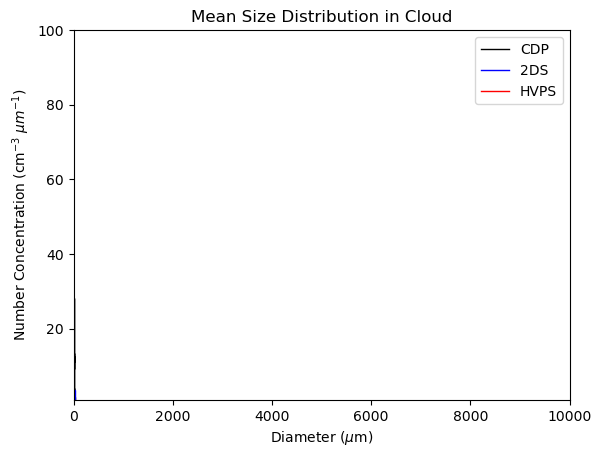

In [26]:
diameter_2DS = np.array(bin_mid_2DS.values)
diameter_2DS = np.append(diameter_2DS, 50)

diameter_HVPS = np.array(bin_mid_HVPS.values)
diameter_HVPS = np.append(diameter_HVPS, 50)

mean_size_dist_2DS = size_dist_2DS.mean('Time')
mean_size_dist_HVPS = size_dist_HVPS.mean('Time')


plt.stairs(mean_size_dist, diameter,color='k', label='CDP') #CDP
plt.stairs(mean_size_dist_2DS, diameter_2DS, color='b', label='2DS') #2DS
plt.stairs(mean_size_dist_HVPS, diameter_HVPS, color='r', label='HVPS') #HVPS
plt.legend()
plt.title('Mean Size Distribution in Cloud')
plt.ylabel('Number Concentration (cm$^{-3}$ $\mu m^{-1}$)')
plt.xlabel('Diameter ($\mu$m)')
plt.ylim(1, 100)
plt.xlim(0, 10000)
plt.savefig('./%s.png' %('Lab2-Afrifa-Fig5'),bbox_inches='tight',dpi=100)

3. PLOT 6: Let’s now re-plot our size distribution in a more useful fashion….you will need to modify your axes so that both (x) and (y) are logarithmic. Choose a suitable range for each…for me I chose to range my ordinate from 10-12 to 103 cm-3 µm-1, and my abscissa from 1 to 10000 µm. Note that over the size range given, the concentration varies by more than 10 orders of magnitude!

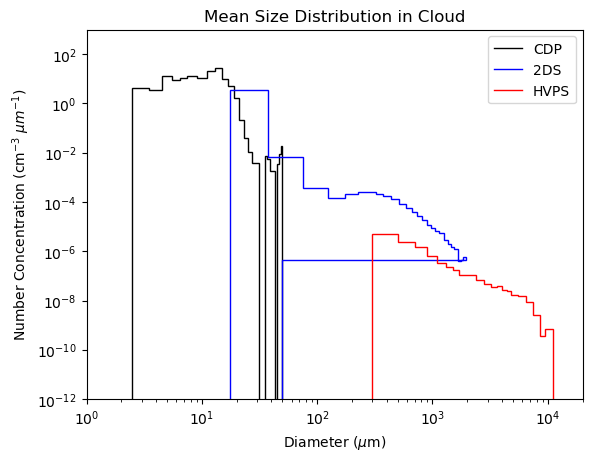

In [27]:
plt.stairs(mean_size_dist, diameter,color='k', label='CDP') 
plt.stairs(mean_size_dist_2DS, diameter_2DS, color='b', label='2DS')
plt.stairs(mean_size_dist_HVPS, diameter_HVPS, color='r', label='HVPS') 
plt.title('Mean Size Distribution in Cloud')
plt.ylabel('Number Concentration (cm$^{-3}$ $\mu m^{-1}$)')
plt.xlabel('Diameter ($\mu$m)')
plt.ylim(1e-12, 1e3)
plt.xlim(1, 2e4)
plt.yscale('log'); plt.xscale('log')
plt.legend()
plt.savefig('./%s.png' %('Lab2-Afrifa-Fig6'),bbox_inches='tight',dpi=100)

4. PLOT 7: Finally, create a plot showing the volume size distribution across this large range of hydrometeor sizes. Follow the same process as you did in Problem 1a, #7 above. Use logarithmic axes in your plot and choose appropriate ranges.

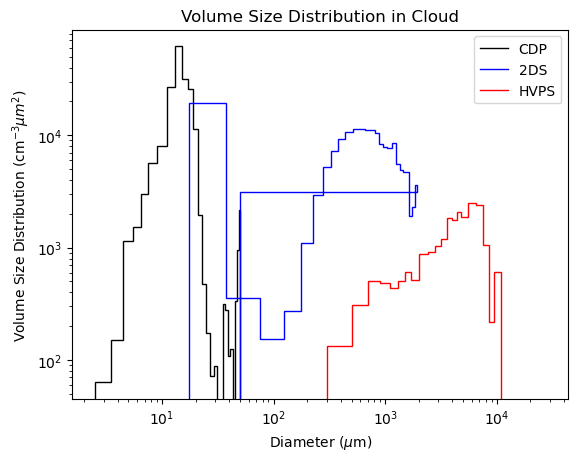

In [28]:
diameter_2DS_cubed = bin_mid_2DS**3
Nv_2DS = mean_size_dist_2DS*diameter_2DS_cubed

diameter_HVPS_cubed = bin_mid_HVPS**3
Nv_HVPS = mean_size_dist_HVPS*diameter_HVPS_cubed

plt.stairs(Nv, diameter,color='k', label='CDP') 
plt.stairs(Nv_2DS, diameter_2DS, color='b', label='2DS')
plt.stairs(Nv_HVPS, diameter_HVPS, color='r', label='HVPS') 
plt.title('Volume Size Distribution in Cloud')
plt.ylabel('Volume Size Distribution (cm$^{-3}$$\mu m^{2}$)')
plt.xlabel('Diameter ($\mu$m)')
plt.yscale('log'); plt.xscale('log')
plt.legend()
plt.savefig('./%s.png' %('Lab2-Afrifa-Fig7'),bbox_inches='tight',dpi=100)